## Capstone 2 - Abalone Age Prediction
### Modeling
**Context**:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

_Credit: https://www.kaggle.com/rodolfomendes/abalone-dataset_

**Goal**: The goal of this capstone project is to build a regression model that can predict the age of an abalone shell by accurately predicting its ring count.


**Modeling Objective**: Build two to three different models and identify the best one to predict the age of an abalone. 

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint

In [3]:
#Import abalone dataset
abalone_data = pd.read_csv('/Users/joyopsvig/github/springboard/2-CapstoneAbalone/Notebooks/abaloneEDA_cleaned.csv')

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


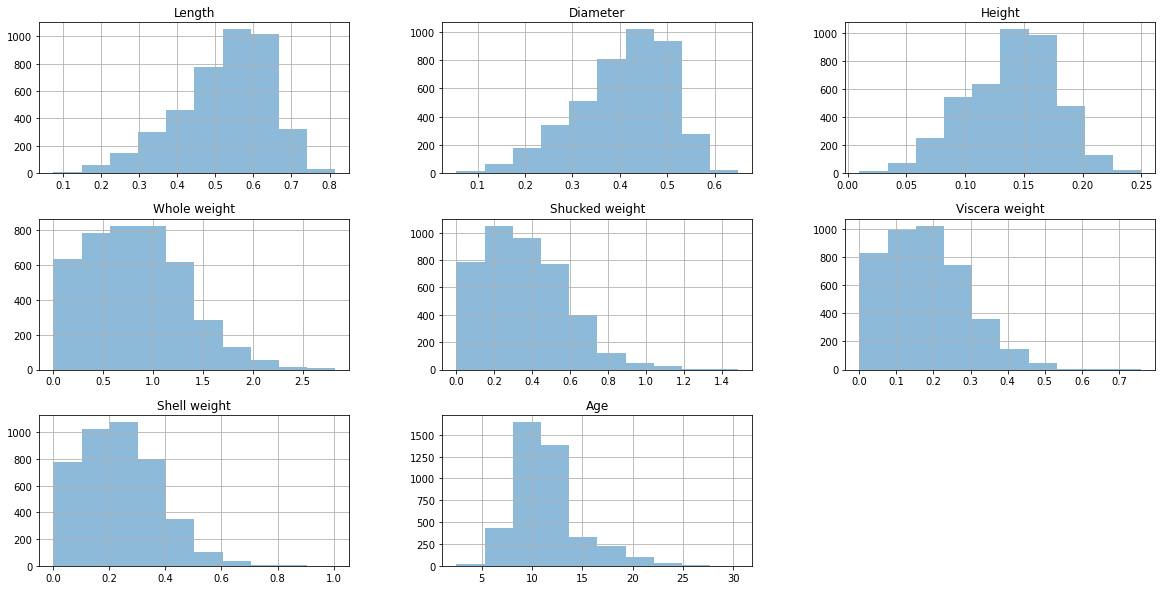

In [4]:
#Plot histograms to view distribution of data
abalone_data.hist(alpha=0.5, figsize=(20, 10))
plt.show()

In [5]:
#One hot encode the 'Sex' column since it is categorical
one_hot = pd.get_dummies(abalone_data['Sex'])

# Drop 'Sex' column as it is now encoded
abalone_data = abalone_data.drop('Sex',axis = 1)

# Join the encoded df
abalone_data = abalone_data.join(one_hot)

#Confirm Sex is one hot encoded
abalone_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [6]:
#Drop response variable
X = abalone_data.drop('Age', axis = 1)
y = abalone_data['Age']

## Multiple Variate Regression Model

_In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. Wikipedia_

In [24]:
#Transform data so that it has a mean of 0 and std of 1
standardScale = StandardScaler()
standardScale.fit_transform(X)

#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#Create the linear regression model
regr = linear_model.LinearRegression()

#Fit the model to training data
regr.fit(X_train, y_train)

#Predict the test results
y_pred = regr.predict(X_test)

In [53]:
#View real values compared to predicted values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
2067,10.5,9.638243
2430,12.5,14.399686
1532,7.5,7.840695
3402,9.5,10.109722
3043,11.5,11.540601
...,...,...
2616,14.5,14.963532
685,16.5,13.617109
1266,10.5,9.618276
3715,8.5,8.971579


In [54]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df['Difference'] = abs(df['Real Values'] - df['Predicted Values'])

#Sort new table by the highest absolute differences
df.sort_values(by=['Difference'], ascending=False, inplace=True)
df

,Real Values,Predicted Values,Difference
2303,24.5,12.363693,12.136307
2181,7.5,15.911666,8.411666
613,19.5,11.121726,8.378274
314,24.5,16.227740,8.272260
483,20.5,12.265412,8.234588
...,...,...,...
2748,9.5,9.517207,0.017207
453,12.5,12.517203,0.017203
333,6.5,6.516078,0.016078
4087,10.5,10.513215,0.013215


<AxesSubplot:xlabel='Real Values', ylabel='Difference'>

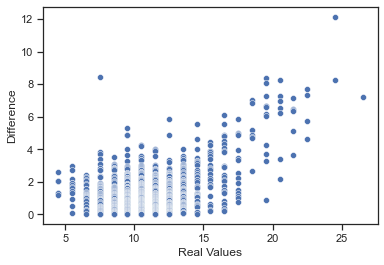

In [55]:
#Create scatterplot to understand which ages see the highest differences in prediction vs real values
import seaborn as sns
sns.set_theme(style='ticks')
sns.scatterplot(x='Real Values', y='Difference', data=df)

In [56]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 530, 811, 3922, 3108, 3701, 1396, 1022]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.420,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
530,0.530,0.420,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
811,0.490,0.365,0.130,0.6835,0.1650,0.1315,0.2050,22.5,1,0,0
3922,0.500,0.400,0.165,0.7105,0.2700,0.1455,0.2250,21.5,1,0,0
3108,0.395,0.300,0.120,0.2995,0.1265,0.0680,0.0895,9.5,0,1,0
3701,0.670,0.510,0.155,1.2780,0.5605,0.3045,0.3580,12.5,1,0,0
1396,0.645,0.510,0.160,1.1835,0.5560,0.2385,0.3450,12.5,0,0,1
1022,0.640,0.500,0.170,1.5175,0.6930,0.3260,0.4090,12.5,1,0,0


**Finding** : My multiple regression model appears to work well on predicting the age of heaver (re: whole weight, shucked weight) abalones around 12.5 years in age, but performs poorly on abalones relatively older in age (age: 21.5+).

In [57]:
#Evaluate multiple regression model performance
regR2score =r2_score(y_test, y_pred)
MSEreg = mean_squared_error(y_test, y_pred)
RMSEreg = np.sqrt(mean_squared_error(y_test, y_pred))

print('R2 score:', regR2score)
print('MSE (mean squared error):', MSEreg)
print('RMSE (root mean squared error):', RMSEreg)

R2 score: 0.5472060499035578
MSE (mean squared error): 4.344359823495681
RMSE (root mean squared error): 2.084312794063233


Reviewing the real values vs the predicted values, the multiple regression model performs OK. An R2 score of 52% suggests that only around half of the observed variation can be explained by the model's inputs. 

## Multiple Variate Regression Pt 2

Because my model performed best on abalones aged 12.5+ or younger, I am going to do a deeper dive to understand at which age threshold the performance weakens.

In [58]:
#Testing multiple regression on different age ranges of abalones
test_thresholds = [*range(7, 25, 1)]

rmse_scores = []
threshold = []

for test_threshold in test_thresholds:
    abalone_data_12 = abalone_data[abalone_data['Age'] <= test_threshold] 
    X = abalone_data_12.drop('Age', axis = 1)
    y = abalone_data_12['Age']

    #Transform data so that it has a mean of 0 and std of 1
    standardScale = StandardScaler()
    standardScale.fit_transform(X)

    #Split data into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    #Create the linear regression model
    regr = linear_model.LinearRegression()

    #Fit the model to training data
    regr.fit(X_train, y_train)

    #Predict the test results
    y_pred = regr.predict(X_test)

    #Evaluate multiple regression model performance
    regR2score =r2_score(y_test, y_pred)
    MSEreg = mean_squared_error(y_test, y_pred)
    RMSEreg = np.sqrt(mean_squared_error(y_test, y_pred))

    # print('Current test threshold:', test_threshold)
    # print('R2 score:', regR2score)
    # print('MSE (mean squared error):', MSEreg)
    # print('RMSE (root mean squared error):', RMSEreg)
    # print('-------------------------')
    rmse_scores.append(RMSEreg)
    threshold.append(test_threshold)

print(rmse_scores)
print(threshold)

[0.5306364534593357, 0.6283729212176762, 0.7512106945459645, 0.7392722100232673, 0.864719373368332, 0.9744216935173611, 1.1234623754040929, 1.2328821991447099, 1.3988882460784562, 1.5340590325455794, 1.684451629783169, 1.7333009770386936, 1.844422761506344, 1.9276293384363812, 1.9955856802609313, 2.118444236172069, 2.0304926884984797, 2.158515935555814]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


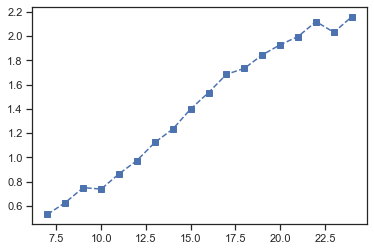

In [59]:
plt.plot(threshold, rmse_scores, 'bs--')

## Random Forest Model

_Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For regression tasks, the mean or average prediction of the individual trees is returned. Wikipedia_

In [105]:
#Create the random forest model and fit it to training data
rf = RandomForestRegressor()

#Fit the model on training data
rf.fit(X_train, y_train)

#Predict the test results
y_pred_test_rf = rf.predict(X_test)

In [106]:
#Evaluate random forest model performance
rfR2score =r2_score(y_test, y_pred_test_rf)
MSErf = mean_squared_error(y_test, y_pred_test_rf)
RMSErf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print('R2 score:', rfR2score)
print('MSE (mean squared error):', MSErf)
print('RMSE (root mean squared error):', RMSErf)

R2 score: 0.3961637057382975
MSE (mean squared error): 6.179762019230769
RMSE (root mean squared error): 2.485912713518069


My random forest model is performly poorly compared to my multiple linear regression model, but I am going to adjust the hyperparameters in order to see if I can improve its performance.

In [107]:
#View parameters currently in use
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


I will now adjust the following set of hyperparamaters to improve my RF model:

n_estimators = number of trees in the forest

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)


In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)  

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [109]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [110]:
#View the best parameters
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [111]:
#Compare the base model with the random search model to determine if random search yielded a better performing model
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
Average Error: 2.0411 degrees.
Accuracy = 81.46%.


In [113]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.8592 degrees.
Accuracy = 83.12%.
Improvement of 2.03%.


Now that I've used random search to narrow down the range for each hyperparameter, I know where to concentrate my search. I now can explicitly specify every combination of settings to try via GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations I define. - _TowardsDataScience_

In [114]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, 130, 140],
    'max_features': [4, 8],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [400, 800, 900, 1000]
}

# Create a based model
rf4 = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf4, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [116]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 140,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 900}

In [119]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.8445 degrees.
Accuracy = 83.27%.
Improvement of 2.21%.


In [123]:
#Create new model with best params
rf3  = RandomForestRegressor(bootstrap=True, max_depth=140, max_features=4, min_samples_leaf=2, min_samples_split=12, n_estimators=900)

#Fit the model on training data
rf3.fit(X_train, y_train)

#Predict the test results
y_pred_test_rf3 = rf3.predict(X_test)
 
R2scorerf3 =r2_score(y_test, y_pred_test_rf3)
MSErf3 = mean_squared_error(y_test, y_pred_test_rf3)
RMSErf3 = np.sqrt(mean_squared_error(y_test, y_pred_test_rf3))

print('R2 score:', R2scorerf3)
print('MSE (mean squared error):', MSErf3)
print('RMSE (root mean squared error):', RMSErf3)

R2 score: 0.45989287308886106
MSE (mean squared error): 5.527547020475614
RMSE (root mean squared error): 2.3510735889111625


Despite the hyperparameter tuning for my Random Forest model, the model still did not improve, and it does not outperform my multiple variate model.

## Gradient Boost Model

_Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. Wikipedia_

In [69]:
#Create the gb model
gb = GradientBoostingRegressor()

#Fit the model on training data
gb.fit(X_train, y_train)

#Predict the test results
y_pred_test_gb = gb.predict(X_test)

#View real values compared to predicted values
df4 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_gb})
df4

,Real Values,Predicted Values
1606,9.5,10.730113
2777,10.5,10.738247
3593,12.5,12.422353
2857,12.5,11.512259
3772,10.5,10.343333
...,...,...
94,16.5,15.139866
766,14.5,15.038986
1686,10.5,12.333490
867,13.5,11.452416


In [70]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df4['Difference'] = abs(df4['Real Values'] - df4['Predicted Values'])

#Sort new table by the highest absolute differences
df4.sort_values(by=['Difference'], ascending=False, inplace=True)
df4

,Real Values,Predicted Values,Difference
351,23.5,12.518143,10.981857
433,23.5,13.632573,9.867427
3922,21.5,12.974774,8.525226
613,19.5,10.994756,8.505244
431,21.5,13.358482,8.141518
...,...,...,...
3549,10.5,10.495663,0.004337
2593,12.5,12.503297,0.003297
1304,10.5,10.498727,0.001273
1844,9.5,9.501195,0.001195


In [71]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 530, 3147, 313, 68, 835, 16, 2652]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.42,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
530,0.530,0.42,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
3147,0.700,0.54,0.215,1.9780,0.6675,0.3125,0.7100,25.5,1,0,0
313,0.620,0.47,0.200,1.2255,0.3810,0.2700,0.4350,24.5,1,0,0
68,0.475,0.39,0.120,0.5305,0.2135,0.1155,0.1700,11.5,1,0,0
835,0.450,0.35,0.130,0.5470,0.2450,0.1405,0.1405,9.5,0,1,0
16,0.355,0.28,0.085,0.2905,0.0950,0.0395,0.1150,8.5,0,1,0
2652,0.545,0.43,0.140,0.8320,0.4355,0.1700,0.2010,10.5,1,0,0


**Finding** : Similar to my multiple regression model, the gradient boost models appears to work well on predicting the age of abalones around 9.5-11.5 years old, but performs poorly on abalones relatively older in age (age: 21.5+).

In [72]:
#Evaluate gb model performance
gbR2score =r2_score(y_test, y_pred_test_gb)
MSEgb = mean_squared_error(y_test, y_pred_test_gb)
RMSEgb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))

print('R2 score:', gbR2score)
print('MSE (mean squared error):', MSEgb)
print('RMSE (root mean squared error):', RMSEgb)

R2 score: 0.5578208829234015
MSE (mean squared error): 4.525335325774022
RMSE (root mean squared error): 2.127283555564237


## Support Vector Regression (SVR)

_Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points. Towards Data Science_

In [73]:
#Create the SVR model
svr = SVR()

#Fit the model on training data
svr.fit(X_train, y_train)

#Predict the test results
y_pred_test_svr = svr.predict(X_test)

#View real values compared to predicted values
df5 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_svr})
df5


,Real Values,Predicted Values
1606,9.5,10.320543
2777,10.5,11.006819
3593,12.5,12.216211
2857,12.5,11.825508
3772,10.5,10.655913
...,...,...
94,16.5,13.779728
766,14.5,13.133352
1686,10.5,11.782155
867,13.5,12.085410


In [74]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df5['Difference'] = abs(df5['Real Values'] - df5['Predicted Values'])

#Sort new table by the highest absolute differences
df5.sort_values(by=['Difference'], ascending=False, inplace=True)
df5

,Real Values,Predicted Values,Difference
351,23.5,12.444285,11.055715
433,23.5,12.793077,10.706923
811,22.5,12.826418,9.673582
613,19.5,9.942978,9.557022
3922,21.5,12.126771,9.373229
...,...,...,...
1875,10.5,10.487463,0.012537
835,9.5,9.510909,0.010909
1154,9.5,9.510835,0.010835
3428,7.5,7.492595,0.007405


In [75]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 530, 3147, 313, 68, 835, 16, 2652]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.42,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
530,0.530,0.42,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
3147,0.700,0.54,0.215,1.9780,0.6675,0.3125,0.7100,25.5,1,0,0
313,0.620,0.47,0.200,1.2255,0.3810,0.2700,0.4350,24.5,1,0,0
68,0.475,0.39,0.120,0.5305,0.2135,0.1155,0.1700,11.5,1,0,0
835,0.450,0.35,0.130,0.5470,0.2450,0.1405,0.1405,9.5,0,1,0
16,0.355,0.28,0.085,0.2905,0.0950,0.0395,0.1150,8.5,0,1,0
2652,0.545,0.43,0.140,0.8320,0.4355,0.1700,0.2010,10.5,1,0,0


In [76]:
#Evaluate SVR model performance
svrR2score =r2_score(y_test, y_pred_test_svr)
MSEsvr = mean_squared_error(y_test, y_pred_test_svr)
RMSEsvr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))

print('R2 score:', svrR2score)
print('MSE (mean squared error):', MSEsvr)
print('RMSE (root mean squared error):', RMSEsvr)

R2 score: 0.4964948278766238
MSE (mean squared error): 5.152956469731099
RMSE (root mean squared error): 2.2700124382326847


## K Nearest Neighbors (KNN)

_KNN model is popularly used for non-linear regression in Machine Learning. KNN (K Nearest Neighbours) follows an easy implementation approach for non-linear regression in Machine Learning. KNN assumes that the new data point is similar to the existing data points. The new data point is compared to the existing categories and is placed under a relatable category. The average value of the k nearest neighbors is taken as the input in this algorithm. The neighbors in KNN models are given a particular weight that defines their contribution to the average value. Jigsaw Academy_

In [77]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.295101259095433
RMSE value for k=  2 is: 2.7707260920060426
RMSE value for k=  3 is: 2.676743780222019
RMSE value for k=  4 is: 2.5473992204720366
RMSE value for k=  5 is: 2.477506500806499
RMSE value for k=  6 is: 2.4199083033415123
RMSE value for k=  7 is: 2.3945827794415706
RMSE value for k=  8 is: 2.378315625888657
RMSE value for k=  9 is: 2.3460859283678954
RMSE value for k=  10 is: 2.334745909416796
RMSE value for k=  11 is: 2.3225791284712285
RMSE value for k=  12 is: 2.306231397441941
RMSE value for k=  13 is: 2.296360243664868
RMSE value for k=  14 is: 2.2934493090373764
RMSE value for k=  15 is: 2.289185836683382
RMSE value for k=  16 is: 2.2874643689427585
RMSE value for k=  17 is: 2.2811254687789426
RMSE value for k=  18 is: 2.2863879893812213
RMSE value for k=  19 is: 2.281333544278749
RMSE value for k=  20 is: 2.2893298691975343


In [78]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[11,12,13,14,15,16,17,18]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 16}

In [79]:
#Create the KNN model and fit it to training data
knn = KNeighborsRegressor(n_neighbors = 16)

#Fit the model on training data
knn.fit(X_train, y_train)

#Predict the test results
y_pred_test_knn = knn.predict(X_test)

#View real values compared to predicted values
df6 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_knn})
df6

#Create new table to understand where the biggest discrepencies in real and predicted values are
df6['Difference'] = abs(df6['Real Values'] - df6['Predicted Values'])

#Sort new table by the highest absolute differences
df6.sort_values(by=['Difference'], ascending=False, inplace=True)
df6

,Real Values,Predicted Values,Difference
433,23.5,13.8750,9.6250
431,21.5,12.5625,8.9375
613,19.5,10.5625,8.9375
351,23.5,15.0000,8.5000
811,22.5,14.0000,8.5000
...,...,...,...
2699,14.5,14.5000,0.0000
803,8.5,8.5000,0.0000
3739,13.5,13.5000,0.0000
3117,11.5,11.5000,0.0000


In [80]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[530, 433, 3147, 483, 3753, 2875, 2643, 1246]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
530,0.530,0.420,0.185,0.7520,0.2990,0.1560,0.205,21.5,0,1,0
433,0.545,0.420,0.140,0.7505,0.2475,0.1300,0.255,23.5,0,0,1
3147,0.700,0.540,0.215,1.9780,0.6675,0.3125,0.710,25.5,1,0,0
483,0.580,0.460,0.150,0.9955,0.4290,0.2120,0.260,20.5,1,0,0
3753,0.510,0.395,0.105,0.5525,0.2340,0.1270,0.165,9.5,0,1,0
2875,0.460,0.360,0.140,0.4470,0.1610,0.0870,0.160,10.5,0,1,0
2643,0.490,0.380,0.110,0.5540,0.2935,0.1005,0.150,9.5,0,0,1
1246,0.390,0.300,0.095,0.3265,0.1665,0.0575,0.089,8.5,0,1,0


**Finding** : My KNN model also appears to inaccurately predict abalones with higher ages (20.5+).

In [81]:
#Evaluate KNN model performance
KnnR2score =r2_score(y_test, y_pred_test_knn)
MSEKnn = mean_squared_error(y_test, y_pred_test_knn)
RMSEknn = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))

print('R2 score:', KnnR2score)
print('MSE (mean squared error):', MSEKnn)
print('RMSE (root mean squared error):', RMSEknn)

R2 score: 0.4887231389388068
MSE (mean squared error): 5.232493239182692
RMSE (root mean squared error): 2.2874643689427585


# Conclusion
##### Reviewing the above models, my Random Forest model with the hyperparameters tuned performs best at accurately predicting the age of an abalone. 

In [93]:
print('RMSE for each model')
print('Multiple Linear Regression ', RMSEreg)
print('Ridge Regression ', RMSErr)
print('Random Forest ', RMSErf)
print('Random Forest - Hyperparameters Tuned', RMSErfbest)
print('Gradient Boost ', RMSEgb)
print('SVR ', RMSEsvr)
print('KNN ', RMSEknn)

RMSE for each model
Multiple Linear Regression  2.158515935555814
Ridge Regression  2.178449443649694
Random Forest  2.133642966311915
Random Forest - Hyperparameters Tuned 2.3619126394686987
Gradient Boost  2.127283555564237
SVR  2.2700124382326847
KNN  2.2874643689427585
